In [1]:
import json, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

## Performance: N=499, F1=0.806, kappa=0.614

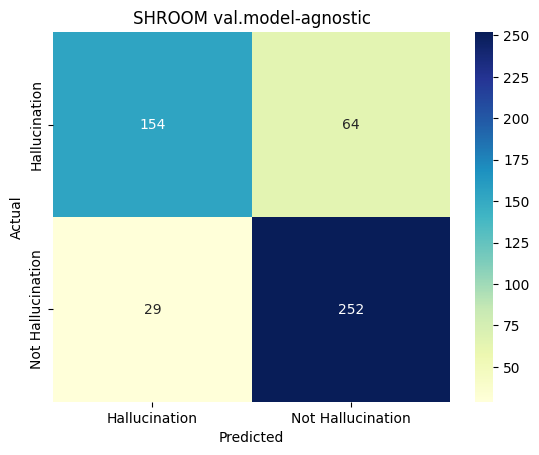

## False negatives

hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),rationale,predicted
(uncountable) The quality or state of being ingenious.,tgt,Poverty is the mother of ingenuity .,"The ability to solve difficult problems, often in original, clever, and inventive ways.",,DM,"['Not Hallucination', 'Hallucination', 'Hallucination', 'Hallucination', 'Not Hallucination']",Hallucination,0.600000,"The output is not a hallucination. While the output definition provided by the language model is not identical to the target, it is still a correct and accurate definition of the term ""ingenuity"". Both definitions refer to the quality of being clever, inventive, and able to solve problems. Therefore, the output is not a hallucination as it provides a valid definition of the term in question.",Not Hallucination
(geometry) Of or pertaining to an oblique angle.,tgt,an obliquangular triangle,"(archaic, geometry) Formed of oblique angles.",,DM,"['Hallucination', 'Hallucination', 'Not Hallucination', 'Hallucination', 'Not Hallucination']",Hallucination,0.600000,"The output is not a hallucination. While the output definition is not identical to the target, it is still accurate and relevant. Both definitions refer to the concept of oblique angles. The output definition, ""Of or pertaining to an oblique angle,"" is a reasonable interpretation of the term ""obliquangular"" and does not introduce any incorrect or off-point information.",Not Hallucination
(transitive) To take on (a task or responsibility).,tgt,Taking on a first employee should be done with care and consideration .,"To acquire, bring in, or introduce.",,DM,"['Hallucination', 'Hallucination', 'Hallucination', 'Hallucination', 'Hallucination']",Hallucination,1.000000,"The output is not a hallucination. The term to be defined in the input is ""Taking on"" and the language model correctly defines it as ""To take on (a task or responsibility)"". This definition aligns with the context provided in the input sentence, which talks about taking on the responsibility of a first employee. Therefore, the output is correct and accurate.",Not Hallucination
(uncountable) The quality of being rigorous.,tgt,"Economics is a messy discipline : too fluid to be a science , too rigorous to be an art . Perhaps it is fitting that economists � most - used metric , gross domestic product ( GDP ) , is a tangle too . GDP measures the total value of output in an economic territory . Its apparent simplicity explains why it is scrutinised down to tenths of a percentage point every month .","Showing, causing, or favoring rigour/rigor; scrupulously accurate or strict; thorough.",,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination', 'Hallucination', 'Hallucination']",Hallucination,0.600000,"The output is not a hallucination. The language model was asked to define the term ""rigorous"" and it provided a definition that aligns with the target. Both the output and target definitions refer to the quality of being strict, thorough, or accurate. Therefore, the output is correct and accurate.",Not Hallucination
The belief that Jesus Christ is the savior of the world.,tgt,"Only minds completely crazed or fatally confused by the current Christomania would suppose that the details of the story , which is as old at least as the cult of Ptah in Memphis , were derived from the "" historic "" version [ � ]",A fanatical devotion to Jesus Christ.,,DM,"['Hallucination', 'Hallucination', 'Hallucination', 'Hallucination', 'Hallucination']",Hallucination,1.000000,"The output is not a hallucination. While the output and target definitions are not identical, they both convey the same general idea of an intense or extreme focus on Jesus Christ. The output definition, ""The belief that Jesus Christ is the savior of the world,"" can be seen as a form of fanatical devotion, which is what the target definition describes. Therefore, the output is correct and accurate.",Not Hallucination
(intransitive) To ejaculate.,tgt,"With a tremendous gro

## False positives

hyp,ref,src,tgt,model,task,labels,label,p(Hallucination),rationale,predicted
(slang) An incel.,tgt,Because redpillers are usually normies or Chadlites while incels are ugly low - value males that women feel innately repulsed by .,"(incel, _, slang) A man of a slightly lower ranking on a scale of physical attractiveness than Chad.",,DM,"['Not Hallucination', 'Not Hallucination', 'Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.200000,"The output is a hallucination. The term to be defined in the input is 'Chadlites', but the output provides a definition for 'incel' instead. Furthermore, the output does not match the target definition provided, which describes 'Chadlites' as men of slightly lower physical attractiveness than 'Chad', not as 'incels'. Therefore, the output is incorrect and off point.",Hallucination
(baseball) A sacrifice bunt.,tgt,"The sacrifice bunt was fielded cleanly , but the only play was to first .",(baseball) A ball that has been intentionally hit softly with a hands-spread batting stance with the intention of advancing a runner at the cost of an out,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination', 'Not Hallucination', 'Hallucination']",Not Hallucination,0.400000,"The output is a hallucination. The task of the language model was to generate a definition for the term ""sacrifice bunt"". The output provided by the model is not a definition, but merely a repetition of the term. The target provides a clear and detailed definition of the term, which the model failed to produce. Therefore, the output is incorrect and off point.",Hallucination
(linguistics) The study of the relationships between words and their meanings.,tgt,The metaontology debate has now migrated from discussions of composition .,The ontology of ontology.,,DM,"['Hallucination', 'Not Hallucination', 'Not Hallucination', 'Not Hallucination', 'Hallucination']",Not Hallucination,0.400000,"The output is a hallucination. The term to be defined is 'metaontology', which refers to the study of ontology itself, or the ontology of ontology. However, the output provided by the language model defines a concept related to linguistics and the relationship between words and their meanings, which is not related to the term 'metaontology'. Therefore, the output is incorrect and off point.",Hallucination
(transitive) To plant again.,tgt,"Many years ago , we decided to relawn and replant the garden .","(transitive, rare) To provide with a new lawn.",,DM,"['Not Hallucination', 'Not Hallucination', 'Not Hallucination', 'Hallucination', 'Not Hallucination']",Not Hallucination,0.200000,"The output is a hallucination. While it is true that ""relawn"" involves planting again, the output definition misses the specific context of providing a new lawn. The term ""relawn"" is not just about replanting, but specifically replanting grass to create a new lawn. Therefore, the output is not accurate.",Hallucination
(informal) A cosplay.,tgt,"Popular cosplays include , for example , characters from the Final Fantasy range of games [ � ]",(countable) A skit or instance of this art or practice.,,DM,"['Hallucination', 'Not Hallucination', 'Hallucination', 'Not Hallucination', 'Not Hallucination']",Not Hallucination,0.400000,"The output is a hallucination. The target definition provided is ""(countable) A skit or instance of this art or practice."" However, the output generated by the language model is ""(informal) A cosplay,"" which does not match the target definition. Furthermore, the output does not provide a clear or accurate definition of the term ""cosplays."" It simply refers to the term in a singular form without explaining what it means. Therefore, the output is incorrect and off point.",Hallucination
The state or quality of being precious.,tgt,"� [ � ] the Pope [ � ] had to send him a valuable Gift , which you may see some day . � N�ssler did , one day , see this preciosity : a Crucifix , ebony bordered with gold , and the Body 

In [2]:
datapoints = json.load(open('results_val.model-agnostic.json', 'r'))
datapoints = [ dp for dp in datapoints if "predicted" in dp ]
results = pd.DataFrame.from_records(datapoints)
cm = pycm.ConfusionMatrix(results["label"].tolist(), results["predicted"].tolist(), digit=2, classes=[ 'Hallucination', 'Not Hallucination' ])

display(Markdown(f'## Performance: N={cm.POP["Hallucination"]}, F1={cm.F1_Macro:.3f}, kappa={cm.Kappa:.3f}'))
df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
ax.set_title("SHROOM val.model-agnostic")
ax.set(xlabel='Predicted', ylabel='Actual')
plt.show()

def display_errors(results):
    fns = results[((results["label"] == 'Hallucination') & (results["predicted"] == 'Not Hallucination'))]
    if len(fns) > 0:
        fns_styler = fns.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False negatives'))
        display(fns_styler)
    fps = results[((results["label"] == 'Not Hallucination') & (results["predicted"] == 'Hallucination'))]
    if len(fps) > 0:
        fps_styler = fps.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False positives'))
        display(fps_styler)

display_errors(results)